#Exercise : DNN - Boston data

#Conduct the DNN analysis using the boston dataset. You are required to improve the performance of the model using different archictecture. 




https://keras.io/api/datasets/boston_housing/

In [3]:
from keras.datasets import boston_housing

In [4]:
#loading the dataset


(X_train, y_train), (X_test, y_test) = boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

57026/57026 [==============================] - 0s 0us/step


In [5]:
print("X_train shape is ", X_train.shape) 
print("Y_train shape is ", y_train.shape) 
print("X_test shape is ", X_test.shape)
print("Y_test shape is ", y_test.shape)

X_train shape is  (404, 13)
Y_train shape is  (404,)
X_test shape is  (102, 13)
Y_test shape is  (102,)


#Import Library

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

#Dropout

In [9]:
#Building a linear stack of layers with the sequantial model
L1 = 200
L2 = 100
L3 = 50 

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu'))#first hidden layer (need to add input dimension)
model.add(Dropout(rate = 0.2))
model.add(Dense(L2, activation= 'relu'))# second hidden layer (do not need to add input dimension))
model.add(Dropout(rate = 0.2))
model.add(Dense(L3, activation= 'relu'))
model.add(Dropout(rate = 0.2))

#output layer (Softmax = multinominal)* because of multiclass
model.add(Dense(1, activation= 'linear'))

In [10]:
#Compiling the sequantial model
model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [12]:
history = model.fit(X_train, y_train, epochs =10, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/10
5/5 [==============================] - 7s 55ms/step - loss: 1523.6324 - mae: 31.0980 - val_loss: 156.1559 - val_mae: 9.7918
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 591.0850 - mae: 19.0502 - val_loss: 418.9387 - val_mae: 18.7450
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 473.7567 - mae: 17.2988 - val_loss: 391.1044 - val_mae: 17.9858
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: 338.6274 - mae: 14.4238 - val_loss: 257.0488 - val_mae: 13.9120
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 285.2780 - mae: 13.0356 - val_loss: 144.2847 - val_mae: 9.5850
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 263.0311 - mae: 12.5042 - val_loss: 208.1808 - val_mae: 12.2422
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: 236.1830 - mae: 12.1175 - val_loss: 316.3089 - val_mae: 15.9849
Epoch 8/10
5/5 [==============================] - 0s 9ms

<Figure size 640x480 with 0 Axes>

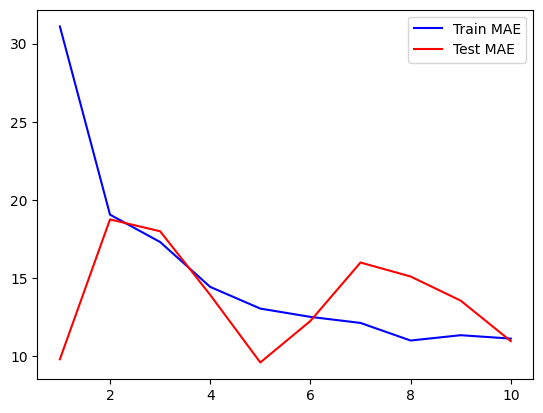

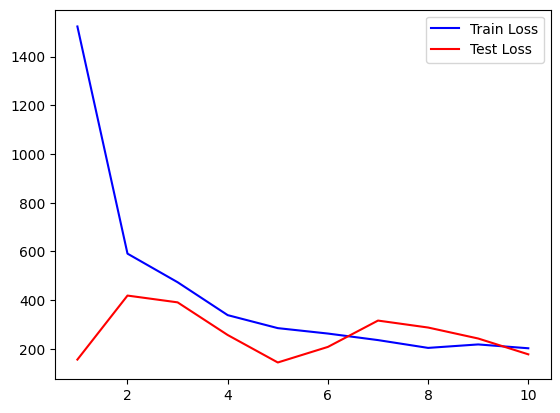

<Figure size 640x480 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt

mae2 = history.history['mae']
val_mae = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

#Initializer & Regularizer 

In [18]:
#Building a linear stack of layers with the sequantial model
L1 = 200
L2 = 100
L3 = 50 

model2 = Sequential()
model2.add(Dense(L1, input_dim = 13, activation = 'relu',kernel_initializer='he_normal', kernel_regularizer= regularizers.l1(0.01)))#first hidden layer (need to add input dimension)
model2.add(Dense(L2, activation= 'relu'))# second hidden layer (do not need to add input dimension))
model2.add(Dense(L3, activation= 'relu'))


#output layer (Softmax = multinominal)* because of multiclass
model2.add(Dense(1, activation= 'linear'))

In [19]:
#Compiling the sequantial model
model2.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [20]:
history2 = model2.fit(X_train, y_train, epochs =10, batch_size = 100, validation_data = (X_test, y_test))

Epoch 1/10
5/5 [==============================] - 2s 45ms/step - loss: 31252.4570 - mae: 140.1964 - val_loss: 21695.6855 - val_mae: 137.1923
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 12528.0420 - mae: 99.2192 - val_loss: 544.1418 - val_mae: 19.5304
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 2965.9131 - mae: 48.5880 - val_loss: 5635.5078 - val_mae: 73.0111
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 3416.3608 - mae: 54.2065 - val_loss: 173.4862 - val_mae: 9.8786
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 994.9167 - mae: 26.3947 - val_loss: 2283.4719 - val_mae: 46.3709
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 1402.9957 - mae: 34.9168 - val_loss: 153.9707 - val_mae: 9.5008
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: 390.5623 - mae: 15.5849 - val_loss: 851.2891 - val_mae: 26.2454
Epoch 8/10
5/5 [============================

<Figure size 640x480 with 0 Axes>

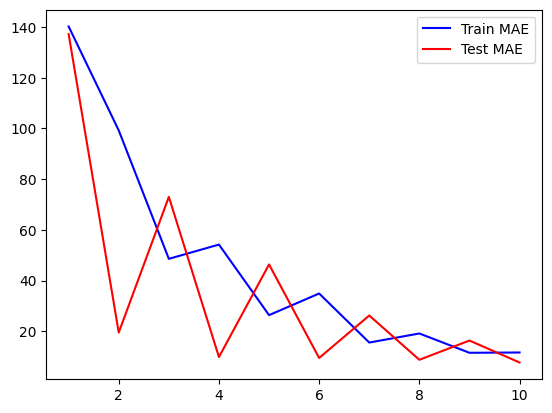

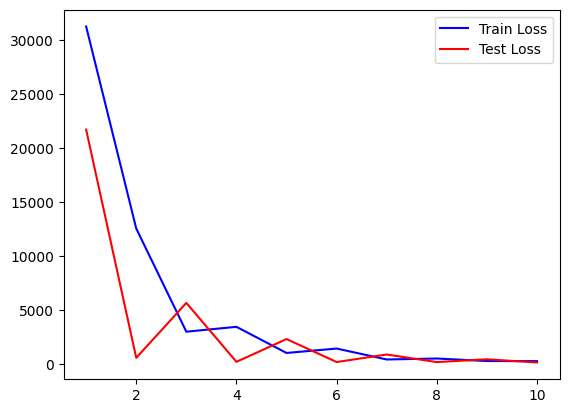

<Figure size 640x480 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt

mae2 = history2.history['mae']
val_mae = history2.history['val_mae']
loss2 = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

#Early Stop

In [23]:
#Building a linear stack of layers with the sequantial model
L1 = 200
L2 = 100
L3 = 50 

model3 = Sequential()
model3.add(Dense(L1, input_dim = 13, activation = 'relu'))#first hidden layer (need to add input dimension)
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L2, activation= 'relu'))# second hidden layer (do not need to add input dimension))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L3, activation= 'relu'))
model3.add(Dropout(rate = 0.2))
model3.add(Dense(L3, activation= 'relu'))
model3.add(Dropout(rate = 0.2))

#output layer (Softmax = multinominal)* because of multiclass
model3.add(Dense(1, activation= 'linear'))

In [24]:
#Compiling the sequantial model
model3.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

In [25]:
early_stopping_monitor =EarlyStopping(patience = 6 ) #stop if no improvement after 6 times

history3 = model3.fit(X_train, y_train, epochs =30, batch_size = 100, validation_data = (X_test, y_test), callbacks= [early_stopping_monitor])

Epoch 1/30
5/5 [==============================] - 2s 44ms/step - loss: 1092.6992 - mae: 25.9346 - val_loss: 178.5826 - val_mae: 10.7732
Epoch 2/30
5/5 [==============================] - 0s 11ms/step - loss: 552.0973 - mae: 18.6362 - val_loss: 312.7357 - val_mae: 15.1462
Epoch 3/30
5/5 [==============================] - 0s 11ms/step - loss: 417.0473 - mae: 15.8744 - val_loss: 245.2233 - val_mae: 13.0746
Epoch 4/30
5/5 [==============================] - 0s 10ms/step - loss: 277.2981 - mae: 13.2086 - val_loss: 160.2130 - val_mae: 10.0150
Epoch 5/30
5/5 [==============================] - 0s 10ms/step - loss: 219.2892 - mae: 11.5084 - val_loss: 156.3361 - val_mae: 9.9239
Epoch 6/30
5/5 [==============================] - 0s 10ms/step - loss: 209.4520 - mae: 11.2199 - val_loss: 205.1222 - val_mae: 12.0308
Epoch 7/30
5/5 [==============================] - 0s 12ms/step - loss: 200.3624 - mae: 10.7317 - val_loss: 182.5793 - val_mae: 11.1499
Epoch 8/30
5/5 [==============================] - 0s 11

<Figure size 640x480 with 0 Axes>

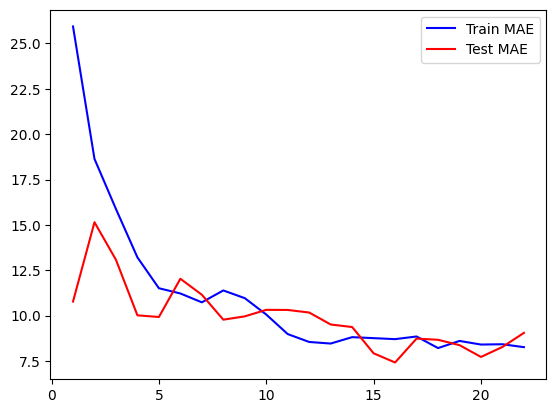

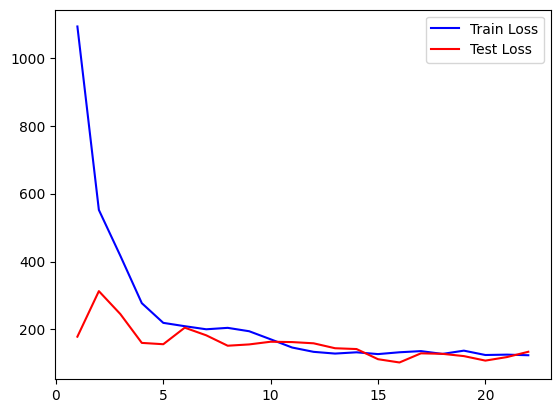

<Figure size 640x480 with 0 Axes>

In [56]:
import matplotlib.pyplot as plt

mae2 = history3.history['mae']
val_mae = history3.history['val_mae']
loss2 = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()

#Grid Search Hyperparameters

In [27]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier 
from scikeras.wrappers import KerasRegressor 

In [29]:
#Building a linear stack of layers with the sequantial model
def create_model():
  model4 = Sequential()
  model4.add(Dense(200, input_dim = 13, activation = 'relu'))#first hidden layer (need to add input dimension)
  model4.add(Dense(100, activation= 'relu'))# second hidden layer (do not need to add input dimension))
  model4.add(Dense(50, activation= 'relu'))
  model4.add(Dense(10, activation= 'relu'))

  #output layer (Softmax = multinominal)* because of multiclass
  model4.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  model4.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

  return model4

#Tune the Batch Size and Epochs

In [40]:
#create model

model4 = KerasRegressor(model = create_model, loss = 'mse',verbose = 0)

#define the grid search parameters
batch_size = [100, 200]
epochs = [10,15,20]
param_grid =  dict(batch_size =  batch_size,
                   epochs = epochs)
grid = GridSearchCV(estimator = model4,
                    param_grid = param_grid,
                    n_jobs = -1, cv = 3) #n_jobs is processing, cv is cross_validation 
grid_result = grid.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [33]:
#summarize result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.369828 using {'batch_size': 100, 'epochs': 20}
0.230695 (0.114276) with: {'batch_size': 100, 'epochs': 10}
0.262028 (0.078634) with: {'batch_size': 100, 'epochs': 15}
0.369828 (0.090098) with: {'batch_size': 100, 'epochs': 20}
0.144495 (0.096467) with: {'batch_size': 200, 'epochs': 10}
0.296753 (0.097522) with: {'batch_size': 200, 'epochs': 15}
0.331326 (0.036321) with: {'batch_size': 200, 'epochs': 20}


#Tune the training Optimization Algorithm (only)

In [38]:
#create model

model5 = KerasRegressor(model = create_model,
                        loss = 'mse',
                         epochs = 20, batch_size = 128, verbose = 0)

#define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid =  dict(optimizer = optimizer)

grid2 = GridSearchCV(estimator = model5,
                    param_grid = param_grid,
                    n_jobs = -1, cv = 3) #n_jobs is processing, cv is cross_validation 

grid_result2 = grid2.fit(X_train, y_train)

In [39]:
#summarize result
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.309090 using {'optimizer': 'Nadam'}
0.303228 (0.104421) with: {'optimizer': 'SGD'}
0.276187 (0.106820) with: {'optimizer': 'RMSprop'}
0.242926 (0.071721) with: {'optimizer': 'Adagrad'}
0.279626 (0.065124) with: {'optimizer': 'Adadelta'}
0.271366 (0.098189) with: {'optimizer': 'Adam'}
0.209900 (0.151103) with: {'optimizer': 'Adamax'}
0.309090 (0.065285) with: {'optimizer': 'Nadam'}


#Tune the Neuron Activation Function

In [48]:
#Building a linear stack of layers with the sequantial model
def create_model2(activation = 'relu'):
  model4 = Sequential()
  model4.add(Dense(200, input_dim = 13, activation = activation))#first hidden layer (need to add input dimension)
  model4.add(Dense(100, activation= activation))# second hidden layer (do not need to add input dimension))
  model4.add(Dense(50, activation= activation))
  model4.add(Dense(10, activation= activation))

  #output layer (Softmax = multinominal)* because of multiclass
  model4.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  model4.compile(loss = 'mse', metrics = ['mae'], optimizer = 'adam')

  return model4

In [49]:
#create model

model6 = KerasRegressor(model = create_model2,
                        loss = 'mse', 
                         epochs = 10, batch_size = 10, verbose = 0)

#define the grid search parameters
activation = ['elu', 'selu', 'relu', 'softmax', 'tanh']

param_grid =  dict(model__activation = activation)

grid3 = GridSearchCV(estimator = model6,
                    param_grid = param_grid,
                    n_jobs = -1, cv = 3) #n_jobs is processing, cv is cross_validation 

grid_result3 = grid3.fit(X_train, y_train)

In [50]:
#summarize result
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.376886 using {'model__activation': 'relu'}
0.286093 (0.119295) with: {'model__activation': 'elu'}
0.277820 (0.142177) with: {'model__activation': 'selu'}
0.376886 (0.052207) with: {'model__activation': 'relu'}
-5.816346 (1.050129) with: {'model__activation': 'softmax'}
-3.106238 (0.786861) with: {'model__activation': 'tanh'}


#Final Model

In [52]:
  modelf = Sequential()
  modelf.add(Dense(200, input_dim = 13, activation = 'relu'))#first hidden layer (need to add input dimension)
  modelf.add(Dense(100, activation= 'relu'))# second hidden layer (do not need to add input dimension))
  modelf.add(Dense(50, activation= 'relu'))
  modelf.add(Dense(10, activation= 'relu'))

  #output layer (Softmax = multinominal)* because of multiclass
  modelf.add(Dense(1, activation= 'linear'))

  #Compiling the sequantial model
  modelf.compile(loss = 'mse', metrics = ['mae'], optimizer = 'Nadam')

In [53]:
early_stopping_monitor =EarlyStopping(patience = 6 ) #stop if no improvement after 6 times

historyf = modelf.fit(X_train, y_train, epochs =20, batch_size = 100, validation_data = (X_test, y_test), callbacks= [early_stopping_monitor])

Epoch 1/20
5/5 [==============================] - 3s 47ms/step - loss: 1106.1465 - mae: 28.9719 - val_loss: 112.8924 - val_mae: 7.8022
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 87.0983 - mae: 6.7325 - val_loss: 80.2748 - val_mae: 6.5599
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 72.0505 - mae: 6.1353 - val_loss: 70.1773 - val_mae: 6.2752
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 64.7025 - mae: 5.6199 - val_loss: 68.6686 - val_mae: 6.0976
Epoch 5/20
5/5 [==============================] - 0s 14ms/step - loss: 63.9144 - mae: 5.5093 - val_loss: 70.3237 - val_mae: 6.1798
Epoch 6/20
5/5 [==============================] - 0s 14ms/step - loss: 64.1189 - mae: 5.4979 - val_loss: 75.8195 - val_mae: 6.3485
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 65.5166 - mae: 5.5456 - val_loss: 85.6239 - val_mae: 6.7656
Epoch 8/20
5/5 [==============================] - 0s 11ms/step - loss: 65.8472 

<Figure size 640x480 with 0 Axes>

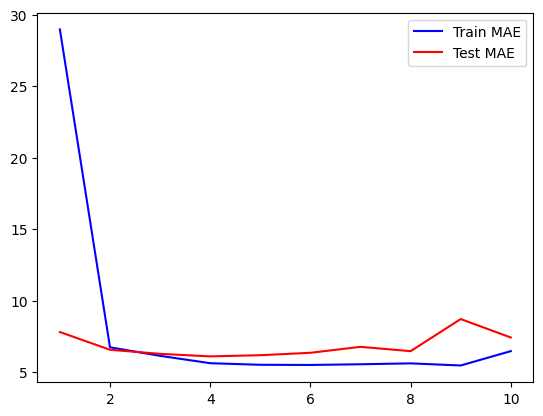

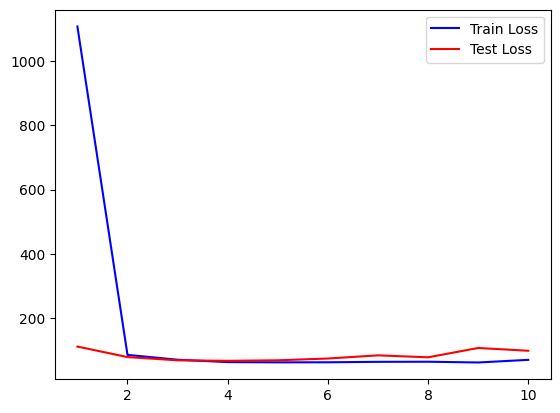

<Figure size 640x480 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt

mae2 = historyf.history['mae']
val_mae = historyf.history['val_mae']
loss2 = historyf.history['loss']
val_loss = historyf.history['val_loss']

epochs = range(1, len(mae2)+1)

plt.plot(epochs, mae2, 'b', label = 'Train MAE')
plt.plot(epochs, val_mae, 'r', label = 'Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()